In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torchvision

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from albumentations.pytorch import ToTensorV2
import albumentations as A

from tqdm import tqdm

## Load Datasets

In [10]:
from datasets import MFNetDataset, HeatNetDataset, CustomDataset

mfnet_data_dir = "./datasets/ir_seg_dataset"
heatnet_data_dir = "./datasets/heatnet_data/train"
custom_data_dir = "./datasets/custom_data"

transforms = [lambda x, y: tuple(map(A.Compose([ToTensorV2()])(image=x, mask=y).get, ["image", "mask"]))]
train_dataset_mfnet = MFNetDataset(mfnet_data_dir, 'train', have_label=True, transform=transforms)
train_dataset_custom = CustomDataset(custom_data_dir, 'train', have_label=True, transform=transforms)

train_dataloader_mfnet = DataLoader(train_dataset_mfnet)
train_dataloader_custom = DataLoader(train_dataset_custom)

## MFNet Dataset IR Histogram

Min 0.0 Max 0.9960784316062927 Mean 0.39541011310759044 Std 0.18480302547407193


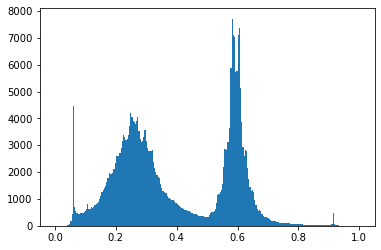

In [20]:
mfnet_hist = np.zeros(255)
max_value = 0
min_value = 1
mean_value = 0
x2_value = 0
for images, labels in train_dataloader_mfnet:
    ir_values = images.numpy()[0, 3].flatten()
    max_value = max(max_value, np.max(ir_values))
    min_value = min(min_value, np.min(ir_values))
    mean_value += np.sum(ir_values)
    x2_value += np.sum(ir_values**2)
    hist, _ = np.histogram(ir_values, bins=255, range=(0, 1))
    mfnet_hist += hist
mfnet_hist /= len(train_dataset_mfnet)
mean_value /= (len(train_dataset_mfnet) * 480 * 640)
x2_value /= (len(train_dataset_mfnet) * 480 * 640)
print(f"Min {min_value} Max {max_value} Mean {mean_value} Std {np.sqrt(x2_value-mean_value**2)}")
plt.stairs(mfnet_hist, np.linspace(0, 1, 256), fill=True)

## Our Dataset IR Histogram

Min 0.0 Max 1.0 Mean 0.5975751018791305 Std 0.2000081881161562


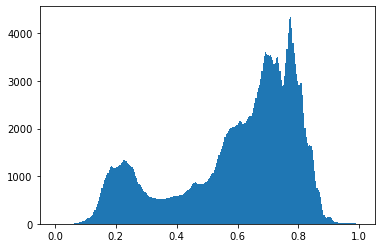

In [21]:
custom_hist = np.zeros(255)
max_value = 0
min_value = 1
mean_value = 0
x2_value = 0
for images, labels in train_dataloader_custom:
    ir_values = images.numpy()[0, 3].flatten()
    max_value = max(max_value, np.max(ir_values))
    min_value = min(min_value, np.min(ir_values))
    mean_value += np.sum(ir_values)
    x2_value += np.sum(ir_values**2)
    hist, _ = np.histogram(ir_values, bins=255, range=(0, 1))
    custom_hist += hist
custom_hist /= len(train_dataset_custom)
mean_value /= (len(train_dataset_custom) * 480 * 640)
x2_value /= (len(train_dataset_custom) * 480 * 640)
print(f"Min {min_value} Max {max_value} Mean {mean_value} Std {np.sqrt(x2_value-mean_value**2)}")
plt.stairs(custom_hist, np.linspace(0, 1, 256), fill=True)